# IE0005 Group Project

<font size="5">Interesting Problem: Detecting the probability of cardiovascular disease early is important</font>

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
pd.options.mode.chained_assignment = None  # default='warn'

# DATA PREPARATION 

In [2]:
#Importing of dataset

cardioData = pd.read_csv('cardio_train.csv', delimiter = ';')
cardioData.rename(columns = {'ap_hi' : 'Systolic BP', 'ap_lo' : 'Diastolic BP', 'alco' : 'Alcohol Intake', 'cardio':'Cardiovascular Disease', 'gluc':'Glucose', 'age':'Age', 'gender':'Gender', 'height':'Height','weight':'Weight','cholesterol':'Cholesterol', 'smoke':'Smoke','active':'Physical Activity'}, inplace=True)
cardioData

,id,Age,Gender,Height,Weight,Systolic BP,Diastolic BP,Cholesterol,Glucose,Smoke,Alcohol Intake,Physical Activity,Cardiovascular Disease
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
#Replaced of binary int with strings
#Changed age from days to years, height from int to float and added BMI into the dataset
#Removing "id" column from the dataset

cardioData['Gender'].replace([1,2],['Women','Men'],inplace=True)
cardioData['Smoke'].replace([0,1],['No','Yes'],inplace=True)
cardioData['Cholesterol'].replace([1,2,3],['Normal','Above Normal','Well Above Normal'],inplace=True)
cardioData['Glucose'].replace([1,2,3],['Normal','Above Normal', 'Well Above Normal'],inplace=True)
cardioData['Physical Activity'].replace([0,1],['No','Yes'],inplace=True)
cardioData['Cardiovascular Disease'].replace([0,1],['No','Yes'],inplace=True)
cardioData['Alcohol Intake'].replace([0,1],['No','Yes'],inplace=True)
cardioData['Age'] = (cardioData['Age']/365).astype(int)
cardioData['Height'] = (cardioData['Height']/100).astype(float)
cardioData['BMI'] = (cardioData['Weight']/(cardioData['Height']*cardioData['Height'])).round(2)
del cardioData['id']
cardioData = cardioData[['Age', 'Gender', 'Height', 'Weight', 'BMI','Systolic BP', 'Diastolic BP',
       'Cholesterol', 'Glucose', 'Smoke', 'Alcohol Intake',
       'Physical Activity', 'Cardiovascular Disease']]
cardioData

,Age,Gender,Height,Weight,BMI,Systolic BP,Diastolic BP,Cholesterol,Glucose,Smoke,Alcohol Intake,Physical Activity,Cardiovascular Disease
0,50,Men,1.68,62.0,21.97,110,80,Normal,Normal,No,No,Yes,No
1,55,Women,1.56,85.0,34.93,140,90,Well Above Normal,Normal,No,No,Yes,Yes
2,51,Women,1.65,64.0,23.51,130,70,Well Above Normal,Normal,No,No,No,Yes
3,48,Men,1.69,82.0,28.71,150,100,Normal,Normal,No,No,Yes,Yes
4,47,Women,1.56,56.0,23.01,100,60,Normal,Normal,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,Men,1.68,76.0,26.93,120,80,Normal,Normal,Yes,No,Yes,No
69996,61,Women,1.58,126.0,50.47,140,90,Above Normal,Above Normal,No,No,Yes,Yes
69997,52,Men,1.83,105.0,31.35,180,90,Well Above Normal,Normal,No,Yes,No,Yes
69998,61,Women,1.63,72.0,27.10,135,80,Normal,Above Normal,No,No,No,Yes


In [4]:
#More information of each columns of the dataset which includes the data type

cardioData.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     70000 non-null  int64  
 1   Gender                  70000 non-null  object 
 2   Height                  70000 non-null  float64
 3   Weight                  70000 non-null  float64
 4   BMI                     70000 non-null  float64
 5   Systolic BP             70000 non-null  int64  
 6   Diastolic BP            70000 non-null  int64  
 7   Cholesterol             70000 non-null  object 
 8   Glucose                 70000 non-null  object 
 9   Smoke                   70000 non-null  object 
 10  Alcohol Intake          70000 non-null  object 
 11  Physical Activity       70000 non-null  object 
 12  Cardiovascular Disease  70000 non-null  object 
dtypes: float64(3), int64(3), object(7)
memory usage: 6.9+ MB


In [5]:
#Change of data type from categorical to numerical
#Statistical summary of the dataset

cardioData['Gender'].replace(['Women','Men'],[1,2],inplace=True)
cardioData['Smoke'].replace(['No','Yes'],[0,1],inplace=True)
cardioData['Cholesterol'].replace(['Normal','Above Normal','Well Above Normal'],[1,2,3],inplace=True)
cardioData['Glucose'].replace(['Normal','Above Normal', 'Well Above Normal'],[1,2,3],inplace=True)
cardioData['Physical Activity'].replace(['No','Yes'],[0,1],inplace=True)
cardioData['Cardiovascular Disease'].replace(['No','Yes'],[0,1],inplace=True)
cardioData['Alcohol Intake'].replace(['No','Yes'],[0,1],inplace=True)

cardioData.describe() 

,Age,Gender,Height,Weight,BMI,Systolic BP,Diastolic BP,Cholesterol,Glucose,Smoke,Alcohol Intake,Physical Activity,Cardiovascular Disease
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,52.840671,1.349571,1.643592,74.205690,27.556545,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.766774,0.476838,0.082101,14.395757,6.091405,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,29.000000,1.000000,0.550000,10.000000,3.470000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,1.590000,65.000000,23.880000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,1.000000,1.650000,72.000000,26.375000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,1.700000,82.000000,30.220000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,2.500000,200.000000,298.670000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# Check if there is any missing value in the dataset
cardioData.isnull().any().any()

False

In [7]:
#Removing of outliers in the dataset

for x in ['Systolic BP','Diastolic BP', 'Age', 'Height', 'Weight', 'BMI']:
    q75,q25 = np.percentile(cardioData.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    cardioData.loc[cardioData[x] < min,x] = np.nan
    cardioData.loc[cardioData[x] > max,x] = np.nan

cardioData.isnull().sum()

Age                          4
Gender                       0
Height                     519
Weight                    1819
BMI                       2000
Systolic BP               1435
Diastolic BP              4632
Cholesterol                  0
Glucose                      0
Smoke                        0
Alcohol Intake               0
Physical Activity            0
Cardiovascular Disease       0
dtype: int64

In [8]:
#drop missing values
cardioData = cardioData.dropna(axis = 0)
#Count missing values in each row and column
cardioData.isnull().sum()

Age                       0
Gender                    0
Height                    0
Weight                    0
BMI                       0
Systolic BP               0
Diastolic BP              0
Cholesterol               0
Glucose                   0
Smoke                     0
Alcohol Intake            0
Physical Activity         0
Cardiovascular Disease    0
dtype: int64

In [9]:
#data after removing outliers
cardioData['Gender'].replace([1,2],['Women','Men'],inplace=True)
cardioData['Smoke'].replace([0,1],['No','Yes'],inplace=True)
cardioData['Cholesterol'].replace([1,2,3],['Normal','Above Normal','Well Above Normal'],inplace=True)
cardioData['Glucose'].replace([1,2,3],['Normal','Above Normal', 'Well Above Normal'],inplace=True)
cardioData['Physical Activity'].replace([0,1],['No','Yes'],inplace=True)
cardioData['Cardiovascular Disease'].replace([0,1],['No','Yes'],inplace=True)
cardioData['Alcohol Intake'].replace([0,1],['No','Yes'],inplace=True)
cardioData

,Age,Gender,Height,Weight,BMI,Systolic BP,Diastolic BP,Cholesterol,Glucose,Smoke,Alcohol Intake,Physical Activity,Cardiovascular Disease
0,50.0,Men,1.68,62.0,21.97,110.0,80.0,Normal,Normal,No,No,Yes,No
1,55.0,Women,1.56,85.0,34.93,140.0,90.0,Well Above Normal,Normal,No,No,Yes,Yes
2,51.0,Women,1.65,64.0,23.51,130.0,70.0,Well Above Normal,Normal,No,No,No,Yes
3,48.0,Men,1.69,82.0,28.71,150.0,100.0,Normal,Normal,No,No,Yes,Yes
5,60.0,Women,1.51,67.0,29.38,120.0,80.0,Above Normal,Above Normal,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,53.0,Women,1.72,70.0,23.66,130.0,90.0,Normal,Normal,No,No,Yes,Yes
69994,57.0,Women,1.65,80.0,29.38,150.0,80.0,Normal,Normal,No,No,Yes,Yes
69995,52.0,Men,1.68,76.0,26.93,120.0,80.0,Normal,Normal,Yes,No,Yes,No
69998,61.0,Women,1.63,72.0,27.10,135.0,80.0,Normal,Above Normal,No,No,No,Yes


In [10]:
#Gives more information of each columns of the cleaned dataset
cardioData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61784 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     61784 non-null  float64
 1   Gender                  61784 non-null  object 
 2   Height                  61784 non-null  float64
 3   Weight                  61784 non-null  float64
 4   BMI                     61784 non-null  float64
 5   Systolic BP             61784 non-null  float64
 6   Diastolic BP            61784 non-null  float64
 7   Cholesterol             61784 non-null  object 
 8   Glucose                 61784 non-null  object 
 9   Smoke                   61784 non-null  object 
 10  Alcohol Intake          61784 non-null  object 
 11  Physical Activity       61784 non-null  object 
 12  Cardiovascular Disease  61784 non-null  object 
dtypes: float64(6), object(7)
memory usage: 6.6+ MB


In [11]:
#Change of data type from categorical to numerical
#Statistical summary of the cleaned dataset

cardioData['Gender'].replace(['Women','Men'],[1,2],inplace=True)
cardioData['Smoke'].replace(['No','Yes'],[0,1],inplace=True)
cardioData['Cholesterol'].replace(['Normal','Above Normal','Well Above Normal'],[1,2,3],inplace=True)
cardioData['Glucose'].replace(['Normal','Above Normal', 'Well Above Normal'],[1,2,3],inplace=True)
cardioData['Physical Activity'].replace(['No','Yes'],[0,1],inplace=True)
cardioData['Cardiovascular Disease'].replace(['No','Yes'],[0,1],inplace=True)
cardioData['Alcohol Intake'].replace(['No','Yes'],[0,1],inplace=True)

cardioData.describe() 

,Age,Gender,Height,Weight,BMI,Systolic BP,Diastolic BP,Cholesterol,Glucose,Smoke,Alcohol Intake,Physical Activity,Cardiovascular Disease
count,61784.000000,61784.000000,61784.000000,61784.000000,61784.000000,61784.000000,61784.000000,61784.000000,61784.000000,61784.000000,61784.000000,61784.000000,61784.000000
mean,52.888402,1.352421,1.645170,72.873852,26.952457,126.321960,81.653810,1.354266,1.219264,0.087142,0.052295,0.804723,0.491551
std,6.744866,0.477728,0.074891,11.988992,4.313780,14.254517,7.654028,0.672429,0.566144,0.282046,0.222623,0.396417,0.499933
min,39.000000,1.000000,1.430000,40.000000,14.530000,90.000000,65.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,1.590000,65.000000,23.877500,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,1.650000,71.000000,26.170000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,1.700000,80.000000,29.710000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,1.860000,107.000000,39.730000,170.000000,105.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


# EXPLORATORY DATA ANALYSIS

In [12]:
#Height

In [13]:
#Weight


<font size="4">OBJECTIVE FEATURES VS CARDIOVASCULAR DISEASE</font>

In [14]:
#Extracting objective features and target variable

Objectivedata = pd.DataFrame(cardioData[['Age', 'Gender', 'Height', 'Weight', 'BMI','Cardiovascular Disease']])

Objectivedata['Gender'].replace([1,2],['Women','Men'],inplace=True)
Objectivedata['Cardiovascular Disease'].replace([0,1],['No','Yes'],inplace=True)

Objectivedata

,Age,Gender,Height,Weight,BMI,Cardiovascular Disease
0,50.0,Men,1.68,62.0,21.97,No
1,55.0,Women,1.56,85.0,34.93,Yes
2,51.0,Women,1.65,64.0,23.51,Yes
3,48.0,Men,1.69,82.0,28.71,Yes
5,60.0,Women,1.51,67.0,29.38,No
...,...,...,...,...,...,...
69993,53.0,Women,1.72,70.0,23.66,Yes
69994,57.0,Women,1.65,80.0,29.38,Yes
69995,52.0,Men,1.68,76.0,26.93,No
69998,61.0,Women,1.63,72.0,27.10,Yes


In [15]:
#Indicate the data type of the dataset
print("Objective Data type : ", type(Objectivedata)) 
#Indicate the number of data points and columns in the dataset
print("Objective Data dimensions : ", Objectivedata.shape) 
print(Objectivedata.dtypes)

Objective Data type :  <class 'pandas.core.frame.DataFrame'>
Objective Data dimensions :  (61784, 6)
Age                       float64
Gender                     object
Height                    float64
Weight                    float64
BMI                       float64
Cardiovascular Disease     object
dtype: object


In [16]:
#Gives more information of each columns of the objective features and target variable

Objectivedata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61784 entries, 0 to 69999
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     61784 non-null  float64
 1   Gender                  61784 non-null  object 
 2   Height                  61784 non-null  float64
 3   Weight                  61784 non-null  float64
 4   BMI                     61784 non-null  float64
 5   Cardiovascular Disease  61784 non-null  object 
dtypes: float64(4), object(2)
memory usage: 3.3+ MB


In [17]:
#Change of data type from categorical to numerical
#Gives the statistical summary of objective features and target variable

Objectivedata['Gender'].replace(['Women','Men'],[1,2],inplace=True)
Objectivedata['Cardiovascular Disease'].replace(['No','Yes'],[0,1],inplace=True)

Objectivedata.describe()

,Age,Gender,Height,Weight,BMI,Cardiovascular Disease
count,61784.000000,61784.000000,61784.000000,61784.000000,61784.000000,61784.000000
mean,52.888402,1.352421,1.645170,72.873852,26.952457,0.491551
std,6.744866,0.477728,0.074891,11.988992,4.313780,0.499933
min,39.000000,1.000000,1.430000,40.000000,14.530000,0.000000
25%,48.000000,1.000000,1.590000,65.000000,23.877500,0.000000
50%,54.000000,1.000000,1.650000,71.000000,26.170000,0.000000
75%,58.000000,2.000000,1.700000,80.000000,29.710000,1.000000
max,64.000000,2.000000,1.860000,107.000000,39.730000,1.000000


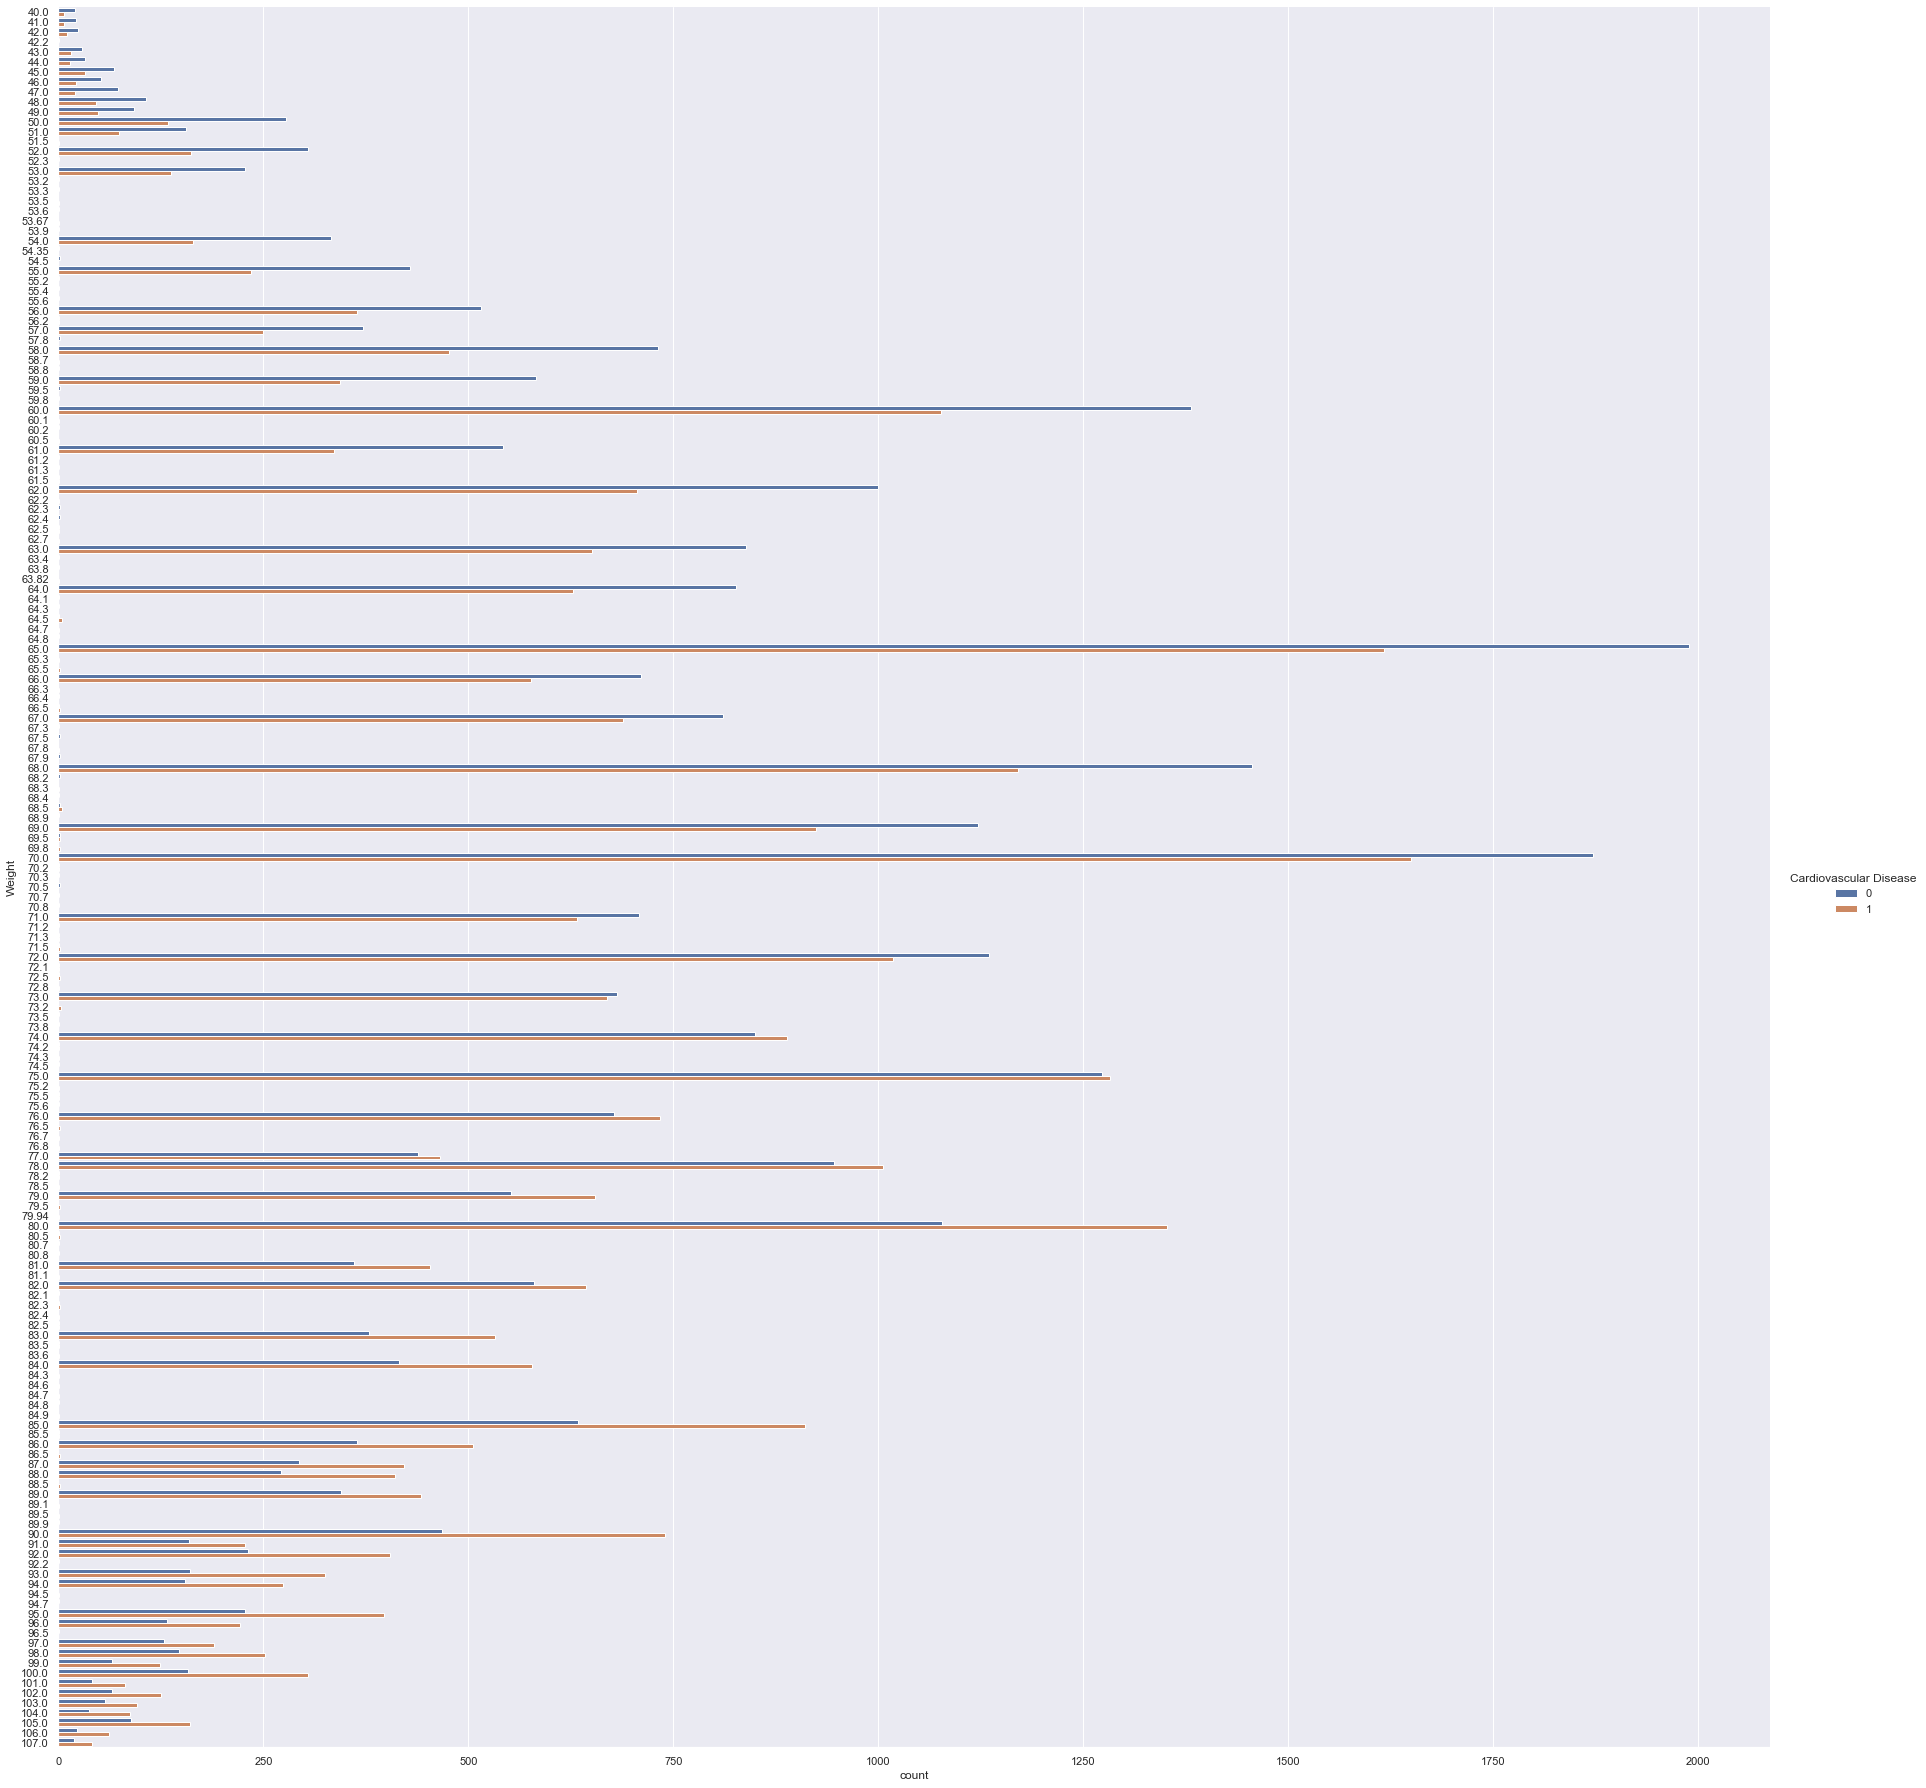

In [18]:
#Comparing Weight with Cardiovascular Disease
sb.catplot(y = "Weight", data = Objectivedata, kind = "count", hue = 'Cardiovascular Disease', height = 25) 

<font size="4">EXAMINATION FEATURES VS CARDIOVASCULAR DISEASE</font>

In [19]:
#Extracting Examination features and target variable

examData = pd.DataFrame(cardioData[['Systolic BP', 'Diastolic BP', 'Cholesterol', 'Glucose','Cardiovascular Disease']])

examData['Cholesterol'].replace([1,2,3],['Normal','Above Normal','Well Above Normal'],inplace=True)
examData['Glucose'].replace([1,2,3],['Normal','Above Normal', 'Well Above Normal'],inplace=True)
examData['Cardiovascular Disease'].replace([0,1],['No','Yes'],inplace=True)

examData

,Systolic BP,Diastolic BP,Cholesterol,Glucose,Cardiovascular Disease
0,110.0,80.0,Normal,Normal,No
1,140.0,90.0,Well Above Normal,Normal,Yes
2,130.0,70.0,Well Above Normal,Normal,Yes
3,150.0,100.0,Normal,Normal,Yes
5,120.0,80.0,Above Normal,Above Normal,No
...,...,...,...,...,...
69993,130.0,90.0,Normal,Normal,Yes
69994,150.0,80.0,Normal,Normal,Yes
69995,120.0,80.0,Normal,Normal,No
69998,135.0,80.0,Normal,Above Normal,Yes


In [20]:
#Indicate the data type of the dataset
#Indicate the number of data points and columns in the dataset
print("Examination Data type : ", type(examData)) 
print("Examination Data dimensions : ", examData.shape)
print(examData.dtypes)

Examination Data type :  <class 'pandas.core.frame.DataFrame'>
Examination Data dimensions :  (61784, 5)
Systolic BP               float64
Diastolic BP              float64
Cholesterol                object
Glucose                    object
Cardiovascular Disease     object
dtype: object


In [21]:
#Gives more information of each columns of the examination features and target variable
examData.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61784 entries, 0 to 69999
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Systolic BP             61784 non-null  float64
 1   Diastolic BP            61784 non-null  float64
 2   Cholesterol             61784 non-null  object 
 3   Glucose                 61784 non-null  object 
 4   Cardiovascular Disease  61784 non-null  object 
dtypes: float64(2), object(3)
memory usage: 2.8+ MB


In [22]:
#Change of data type from categorical to numerical
examData['Cholesterol'].replace(['Normal','Above Normal','Well Above Normal'],[1,2,3],inplace=True)
examData['Glucose'].replace(['Normal','Above Normal','Well Above Normal'],[1,2,3],inplace=True)
examData['Cardiovascular Disease'].replace(['No','Yes'],[0,1],inplace=True)

examData.describe() #statistical summary of examination features and target variable

,Systolic BP,Diastolic BP,Cholesterol,Glucose,Cardiovascular Disease
count,61784.000000,61784.000000,61784.000000,61784.000000,61784.000000
mean,126.321960,81.653810,1.354266,1.219264,0.491551
std,14.254517,7.654028,0.672429,0.566144,0.499933
min,90.000000,65.000000,1.000000,1.000000,0.000000
25%,120.000000,80.000000,1.000000,1.000000,0.000000
50%,120.000000,80.000000,1.000000,1.000000,0.000000
75%,140.000000,90.000000,1.000000,1.000000,1.000000
max,170.000000,105.000000,3.000000,3.000000,1.000000


<font size="4">SUBJECTIVE FEATURES VS CARDIOVASCULAR DISEASE</font>

In [23]:
#Extract of subjective features and target variable dataset

subData = pd.DataFrame(cardioData[['Smoke', 'Alcohol Intake', 'Physical Activity', 'Cardiovascular Disease']])

subData['Smoke'].replace([0,1],['No','Yes'],inplace=True)
subData['Physical Activity'].replace([0,1],['No','Yes'],inplace=True)
subData['Cardiovascular Disease'].replace([0,1],['No','Yes'],inplace=True)
subData['Alcohol Intake'].replace([0,1],['No','Yes'],inplace=True)

subData

,Smoke,Alcohol Intake,Physical Activity,Cardiovascular Disease
0,No,No,Yes,No
1,No,No,Yes,Yes
2,No,No,No,Yes
3,No,No,Yes,Yes
5,No,No,No,No
...,...,...,...,...
69993,No,No,Yes,Yes
69994,No,No,Yes,Yes
69995,Yes,No,Yes,No
69998,No,No,No,Yes


In [24]:
#Indicate the data type of the dataset
#Indicate the number of data points and columns in the dataset
print("Subjective Data type : ", type(subData)) 
print("Subjective Data dimensions : ", subData.shape)
print(subData.dtypes)

Subjective Data type :  <class 'pandas.core.frame.DataFrame'>
Subjective Data dimensions :  (61784, 4)
Smoke                     object
Alcohol Intake            object
Physical Activity         object
Cardiovascular Disease    object
dtype: object


In [25]:
#Gives more information of each columns of the subjective features and target variable
subData.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61784 entries, 0 to 69999
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Smoke                   61784 non-null  object
 1   Alcohol Intake          61784 non-null  object
 2   Physical Activity       61784 non-null  object
 3   Cardiovascular Disease  61784 non-null  object
dtypes: object(4)
memory usage: 2.4+ MB


In [26]:
#Change of data type from categorical to numerical
subData['Smoke'].replace(['No','Yes'],[0,1],inplace=True)
subData['Physical Activity'].replace(['No','Yes'],[9,1],inplace=True)
subData['Cardiovascular Disease'].replace(['No','Yes'],[0,1],inplace=True)
subData['Alcohol Intake'].replace(['No','Yes'],[0,1],inplace=True)

subData.describe() #statistical summary of subjective features and target variable

,Smoke,Alcohol Intake,Physical Activity,Cardiovascular Disease
count,61784.000000,61784.000000,61784.000000,61784.000000
mean,0.087142,0.052295,2.562217,0.491551
std,0.282046,0.222623,3.171337,0.499933
min,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,9.000000,1.000000


# DATA SCIENCE/MACHINE LEARNING TO SOLVE THE PROBLEM + EVALUATION

<font size="5">Dataset to be used for machine learning</font>

In [27]:
#removing of columns of data that does not solve our problem
cardioData = cardioData.drop(['Smoke','Alcohol Intake','Physical Activity','Gender','Glucose', 'Height'], axis = 1)
#change of data type from numerical to categorical
cardioData['Cholesterol'].replace([1,2,3],['Normal','Above Normal','Well Above Normal'],inplace=True)
cardioData['Cardiovascular Disease'].replace([0,1],['No','Yes'],inplace=True)

cardioData

,Age,Weight,BMI,Systolic BP,Diastolic BP,Cholesterol,Cardiovascular Disease
0,50.0,62.0,21.97,110.0,80.0,Normal,No
1,55.0,85.0,34.93,140.0,90.0,Well Above Normal,Yes
2,51.0,64.0,23.51,130.0,70.0,Well Above Normal,Yes
3,48.0,82.0,28.71,150.0,100.0,Normal,Yes
5,60.0,67.0,29.38,120.0,80.0,Above Normal,No
...,...,...,...,...,...,...,...
69993,53.0,70.0,23.66,130.0,90.0,Normal,Yes
69994,57.0,80.0,29.38,150.0,80.0,Normal,Yes
69995,52.0,76.0,26.93,120.0,80.0,Normal,No
69998,61.0,72.0,27.10,135.0,80.0,Normal,Yes


In [28]:
#Gives more information of each columns of the dataset
cardioData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61784 entries, 0 to 69999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     61784 non-null  float64
 1   Weight                  61784 non-null  float64
 2   BMI                     61784 non-null  float64
 3   Systolic BP             61784 non-null  float64
 4   Diastolic BP            61784 non-null  float64
 5   Cholesterol             61784 non-null  object 
 6   Cardiovascular Disease  61784 non-null  object 
dtypes: float64(5), object(2)
memory usage: 3.8+ MB


In [29]:
#statistical summary of the final dataset to be used for machine learning 
cardioData.describe()

,Age,Weight,BMI,Systolic BP,Diastolic BP
count,61784.000000,61784.000000,61784.000000,61784.000000,61784.000000
mean,52.888402,72.873852,26.952457,126.321960,81.653810
std,6.744866,11.988992,4.313780,14.254517,7.654028
min,39.000000,40.000000,14.530000,90.000000,65.000000
25%,48.000000,65.000000,23.877500,120.000000,80.000000
50%,54.000000,71.000000,26.170000,120.000000,80.000000
75%,58.000000,80.000000,29.710000,140.000000,90.000000
max,64.000000,107.000000,39.730000,170.000000,105.000000


<font size="4">One-Hot Encoding</font>

In [30]:
#checking for parameters in the categorical parameters
print(cardioData['Cholesterol'].unique())
print(cardioData['Cardiovascular Disease'].unique())

['Normal' 'Well Above Normal' 'Above Normal']
['No' 'Yes']


In [31]:
#checking the label counts in the categorical parameters
cardioData['Cholesterol'].value_counts()
cardioData['Cardiovascular Disease'].value_counts()

No     31414
Yes    30370
Name: Cardiovascular Disease, dtype: int64

In [32]:
#change data from categorical to binary
OHEdata = pd.get_dummies(cardioData, columns = ['Cholesterol', 'Cardiovascular Disease'])
OHEdata

,Age,Weight,BMI,Systolic BP,Diastolic BP,Cholesterol_Above Normal,Cholesterol_Normal,Cholesterol_Well Above Normal,Cardiovascular Disease_No,Cardiovascular Disease_Yes
0,50.0,62.0,21.97,110.0,80.0,0,1,0,1,0
1,55.0,85.0,34.93,140.0,90.0,0,0,1,0,1
2,51.0,64.0,23.51,130.0,70.0,0,0,1,0,1
3,48.0,82.0,28.71,150.0,100.0,0,1,0,0,1
5,60.0,67.0,29.38,120.0,80.0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
69993,53.0,70.0,23.66,130.0,90.0,0,1,0,0,1
69994,57.0,80.0,29.38,150.0,80.0,0,1,0,0,1
69995,52.0,76.0,26.93,120.0,80.0,0,1,0,1,0
69998,61.0,72.0,27.10,135.0,80.0,0,1,0,0,1


<font size="4">K-Means Clustering</font>

In [33]:
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans

In [34]:
# Guess the Number of Clusters
num_clust = 20

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust)

# Fit the Clustering Model on the Data
kmeans.fit(OHEdata)

KMeans(n_clusters=20)

In [35]:
# Print the Cluster Centers
print("Features", '\tAge', '\tHeight', '\tWeight', '\tBMI','\tSystolic BP', '\tDiastolic BP',
       '\tCholesterol', '\tCardiovascular Disease')
print()

for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t\t")
    print()

Features 	Age 	Height 	Weight 	BMI 	Systolic BP 	Diastolic BP 	Cholesterol 	Cardiovascular Disease

Cluster 0:	56.36		68.09		25.07		119.97		79.7		0.08		0.84		0.09		0.6		0.4		
Cluster 1:	48.13		84.79		30.65		136.64		90.39		0.2		0.65		0.15		0.25		0.75		
Cluster 2:	52.09		94.66		33.67		121.22		79.78		0.14		0.73		0.13		0.56		0.44		
Cluster 3:	54.98		65.67		25.14		155.95		94.76		0.21		0.65		0.14		0.15		0.85		
Cluster 4:	51.32		84.85		31.11		108.1		72.77		0.16		0.76		0.08		0.69		0.31		
Cluster 5:	48.02		55.06		21.57		107.27		71.79		0.12		0.85		0.03		0.86		0.14		
Cluster 6:	46.79		68.08		25.34		137.75		89.68		0.18		0.69		0.13		0.23		0.77		
Cluster 7:	55.54		75.84		28.21		153.68		84.96		0.21		0.64		0.15		0.13		0.87		
Cluster 8:	55.99		56.75		22.18		120.68		79.56		0.09		0.82		0.08		0.63		0.37		
Cluster 9:	55.52		96.04		34.35		139.77		89.08		0.2		0.56		0.25		0.2		0.8		
Cluster 10:	56.77		67.16		25.33		108.53		72.81		0.14		0.79		0.07		0.67		0.33		
Cluster 11:	57.28		79.84		29.03		119.63		79.87		0

<AxesSubplot:xlabel='Cluster', ylabel='count'>

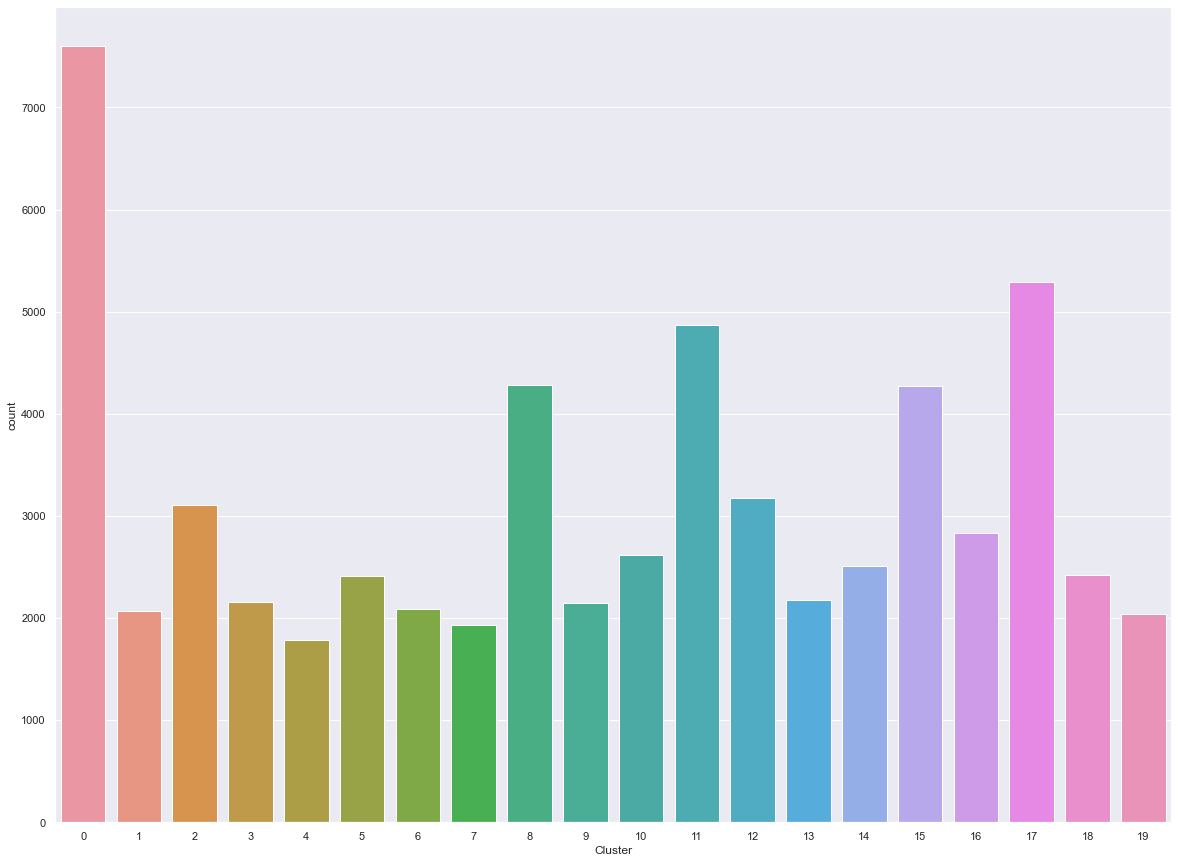

In [36]:
# Predict the Cluster Labels
labels = kmeans.predict(OHEdata)

# Append Labels to the Data
X_labeled = cardioData.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.set(rc={'figure.figsize':(20,15)}) #to change the size of countplot
sb.countplot(x=X_labeled["Cluster"])

In [37]:
# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)

Within Cluster Sum of Squares : 5339516.629036372


<font size="4">Anomalies Detection</font>

In [38]:
# Import LocalOutlierFactor from sklearn.neighbors
from sklearn.neighbors import LocalOutlierFactor

In [39]:
# Set the Parameters for Neighborhood
num_neighbors = 20      # Number of Neighbors
cont_fraction = 0.05    # Fraction of Anomalies

# Create Anomaly Detection Model using LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors = num_neighbors, contamination = cont_fraction)

# Fit the Model on the Data and Predict Anomalies
lof.fit(OHEdata)

LocalOutlierFactor(contamination=0.05)

<AxesSubplot:xlabel='Anomaly', ylabel='count'>

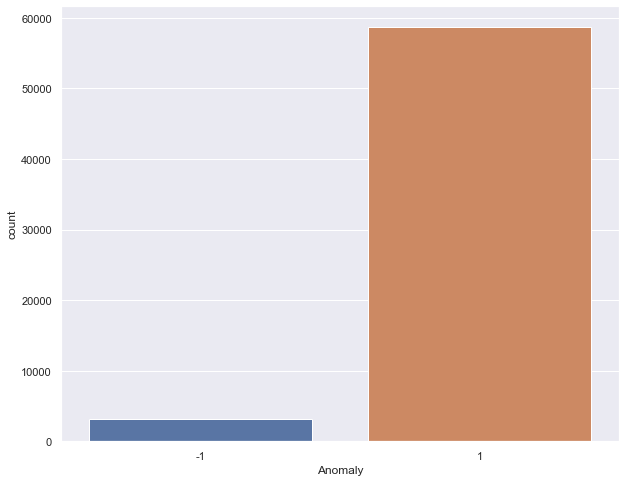

In [40]:
# Predict the Anomalies
labels = lof.fit_predict(OHEdata)

# Append Labels to the Data
X_labeled = OHEdata.copy()
X_labeled["Anomaly"] = pd.Categorical(labels)

# Summary of the Anomaly Labels
sb.set(rc={'figure.figsize':(10,8)}) #to change the size of the count plot
sb.countplot(x=X_labeled["Anomaly"])

<font size="4">Random Forest Classification</font>

In [41]:
#change of data type from numerical to categorical
cardioData['Cholesterol'].replace(['Normal','Above Normal','Well Above Normal'],[1,2,3],inplace=True)
cardioData['Cardiovascular Disease'].replace(['No','Yes'],[0,1],inplace=True)

X = cardioData.drop('Cardiovascular Disease', axis=1)
y = cardioData['Cardiovascular Disease']

In [42]:
from sklearn.model_selection import train_test_split
# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=66)

In [43]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [45]:
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')

In [46]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[7307 3024]
 [3302 6756]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.69      0.71      0.70     10331
           1       0.69      0.67      0.68     10058

    accuracy                           0.69     20389
   macro avg       0.69      0.69      0.69     20389
weighted avg       0.69      0.69      0.69     20389



=== All AUC Scores ===
[0.74303409 0.74249218 0.75248427 0.75048065 0.74126388 0.74638568
 0.74799509 0.73920962 0.73391029 0.74346065]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.7440716408093003


In [47]:
''''
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rfc.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
print('Cardiovascular Disease vs all the other factors')
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
''''

SyntaxError: EOL while scanning string literal (3460264985.py, line 14)

<font size="4">Confusion Matrix</font>

In [48]:
# Import essential models and functions from sklearn


<font size="4">Hyperparameters</font>

In [49]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 


random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 300, 500, 800, 1200], 'max_depth': [5, 8, 15, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


TRYING

In [50]:
split_number = 5

rfc = RandomForestClassifier()
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, 
                                scoring = 'roc_auc', n_iter = 5, 
                                cv = StratifiedKFold(n_splits=split_number),
                                random_state=42, n_jobs=-1)
rfc_random.fit(X, y)
print(rfc_random.cv_results_)

{'mean_fit_time': array([14.10322585,  5.26919861, 32.44846816,  4.54619813,  8.3450706 ]), 'std_fit_time': array([0.02556774, 0.17052517, 0.96660002, 0.22608445, 0.39375555]), 'mean_score_time': array([0.64899178, 0.29676495, 1.23428168, 0.24716816, 0.39345341]), 'std_score_time': array([0.0222496 , 0.01069657, 0.21358569, 0.04543313, 0.03072827]), 'param_n_estimators': masked_array(data=[500, 100, 800, 100, 300],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_samples_split': masked_array(data=[2, 10, 100, 100, 5],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_samples_leaf': masked_array(data=[1, 2, 2, 5, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[8, 30, 25, 15, 8],
             mask=[False, False, False, False, False],
       fill_value='?',
   

In [51]:
rfc_random.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 8}

In [52]:
rfcopt = rfc_random.best_estimator_

In [53]:
rfcopt.fit(X_train,y_train)
# predictions
rfcopt_predict = rfcopt.predict(X_test)

In [54]:
rfcopt_cv_score = cross_val_score(rfcopt, X, y, cv=10, scoring='roc_auc')

In [55]:

#print("=== Confusion Matrix ===")
#print(confusion_matrix(y_test, rfcopt_predict))
#print('\n')
#print("=== Classification Report ===")
#print(classification_report(y_test, rfc_predict))
#print('\n')
#print("=== All AUC Scores ===")
#print(rfc1_cv_score)
#print('\n')
#print("=== Mean AUC Score ===")
#print("Mean AUC Score - Random Forest: ", rfcopt_cv_score.mean())

SyntaxError: EOF while scanning triple-quoted string literal (3920572583.py, line 12)

In [56]:

# Check the Goodness of Fit (on Test Data)
#print("Goodness of Fit of Model \tTest Dataset")
#print("Classification Accuracy \t:", rfcopt.score(X_test, y_test))
#print()

# Plot the Confusion Matrix for Train and Test
#f, axes = plt.subplots(1, 2, figsize=(12, 4))
#print('Cardiovascular Disease vs all the other factors')
#sb.heatmap(confusion_matrix(y_train, y_train_pred),
          # annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
#sb.heatmap(confusion_matrix(y_test, y_test_pred), 
         #  annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


ROC

In [57]:

from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.multioutput import MultiOutputClassifier


Original: ROC AUC=0.744
RandomSearchCV: ROC AUC=0.790


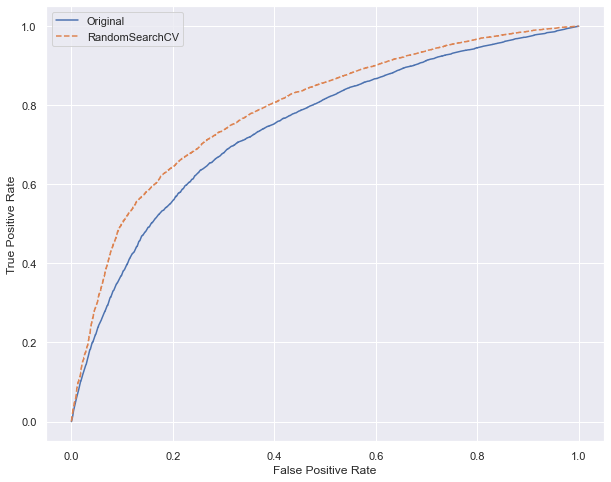

In [61]:
rfc.fit(X_train,y_train)
prob = rfc.predict_proba(X_test)[:,1]
prob_cv=rfcopt.predict_proba(X_test)[:,1]

# calculate scores
auc = roc_auc_score(y_test, prob)
auc_cv = roc_auc_score(y_test, prob_cv)

# summarize scores
print('Original: ROC AUC=%.3f' % (auc))
print('RandomSearchCV: ROC AUC=%.3f' % (auc_cv))

# calculate roc curves
fpr, tpr, _ = roc_curve(y_test, prob)
fpr_cv, tpr_cv, _ = roc_curve(y_test, prob_cv)

# plot the roc curve for the model
plt.plot(fpr, tpr, linestyle='solid', label='Original')
plt.plot(fpr_cv, tpr_cv, linestyle='dashed', label='RandomSearchCV')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()